In [2]:
import re

### Utilisation des groupes pour détecter la répetition d'un mot à la suite.

In [3]:
chaine = 'Bonjour je suis un robot'
result = re.search(r'(\w+)\b (\w+)\b', chaine )


#### Explotation des méthodes de groupe

In [4]:
print(result.groups())
for cp in range(len(result.groups()) + 1):
    print(cp,'=>', result.group(cp), result.span(cp) )

('Bonjour', 'je')
0 => Bonjour je (0, 10)
1 => Bonjour (0, 7)
2 => je (8, 10)


#### La position 0 reprend le motif capturé dans son intégralité

### Comment détecter des répétions de mot ?

#### On utilise un rappel sur le numero du 1er groupe rencontré.  

In [5]:
chaine = 'Bonjour je suis suis un robot'
result = re.search(r'(\w+)\b (\1)', chaine ) # \1 = 1er groupe,\2  2eme groupe  etc

In [7]:
print(result.groups())
for cp in range(len(result.groups()) + 1):
    print(cp,'=>', result.group(cp), result.span(cp) )

('suis', 'suis')
0 => suis suis (11, 20)
1 => suis (11, 15)
2 => suis (16, 20)


#### On peut nommer les groupes

In [22]:
result = re.search(r'(?P<mot>\w+)\b (\1)', chaine )

Le reference au 1er groupe (\1) peut etre remplacée par le nom du groupe

In [8]:
print(result.groups())
for cp in range(len(result.groups()) + 1):
    print(cp,'=>', result.group(cp), result.span(cp) )

('suis', 'suis')
0 => suis suis (11, 20)
1 => suis (11, 15)
2 => suis (16, 20)


In [31]:
print(result.group('mot'), result.span('mot'))

suis (11, 15)


In [38]:
result = re.search(r'(?P<mot>\w+)\b ((?P=mot))', chaine )

In [39]:
print(result.groups())
for cp in range(len(result.groups()) + 1):
    print(cp,'=>', result.group(cp), result. )

('suis', 'suis')
0 => suis suis
1 => suis
2 => suis


### Explication et visualisation avec le site regex101  https://regex101.com/

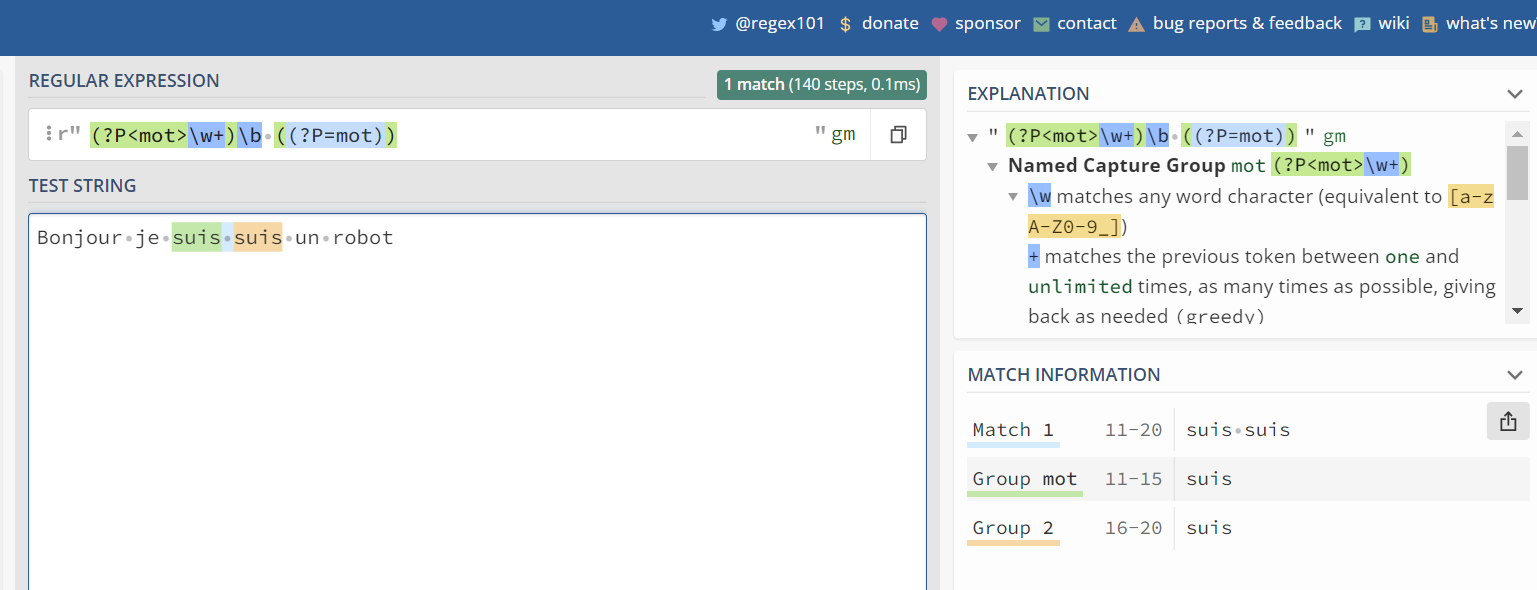

In [40]:
print(result.group('mot'))

suis


In [41]:
result.group(2)

'suis'

#### Remarque le rappel du groupe par le nom ou le numero ne concerne que le texte capturé pas le motif de recherche. dans cet exemple le texte capturé est 'suis' et donc le moteur regex cherche ce même texte dans toute la chaine.


### Utilisation des groupes pour des recherches avant et après 


#### Exemple de recherche avant: on veut tronconner la chaine par groupe de 2 en partant de la fin.

Avant de capturer un groupe, on va chercher à former des paires complète en avant du groupe à capturer.

Pour cela on utilise la sequence de groupe **(?=...)**

In [27]:
for item in re.finditer(r'(\d{1,2})(?=(\d\d)+(?!(\d))|\Z)', '123456789'):
    print(item.groups())

('1', '89', None)
('23', '89', None)
('45', '89', None)
('67', '89', None)
('89', None, None)


#### En ajoutant aux bons endroits le motif  "?:" on ne capture plus les groupes inutiles
Le motif **(?:...)** permet d'effectuer de regroupement mais ne conserve pas la capture dans un groupe

In [25]:
for item in re.finditer(r'(\d{1,2})(?=(?:\d\d)+(?!(?:\d))|\Z)', '123456789'):
    print(item.groups(),item.span())

('1',) (0, 1)
('23',) (1, 3)
('45',) (3, 5)
('67',) (5, 7)
('89',) (7, 9)
